<a href="https://colab.research.google.com/github/TitoMCorral/deemo/blob/main/plantas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#crear carpetas
!mkdir sanas
!mkdir enfermas


In [ ]:
#descomprimir archivos
%cd enfermas
!unzip enfermas.zip
%cd ..

%cd sanas
!unzip sanas.zip
%cd ..



/content/enfermas
Archive:  enfermas.zip
  inflating: WhatsApp Image 2024-11-03 at 4.17.46 PM (1).jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.46 PM.jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.47 PM (1).jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.47 PM (2).jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.47 PM (3).jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.47 PM (4).jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.47 PM (5).jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.47 PM (6).jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.47 PM (7).jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.47 PM (8).jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.47 PM (9).jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.47 PM (10).jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.47 PM (11).jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.47 PM (12).jpeg  
  inflating: WhatsApp Image 2024-11-03 at 4.17.47 PM (13).jpeg  

In [ ]:
#borrar zip
!rm -r /content/sanas/sanas.zip
!rm -r /content/enfermas/enfermas.zip

In [ ]:
!ls /content/sanas | wc -l
!ls /content/enfermas | wc -l

101
59


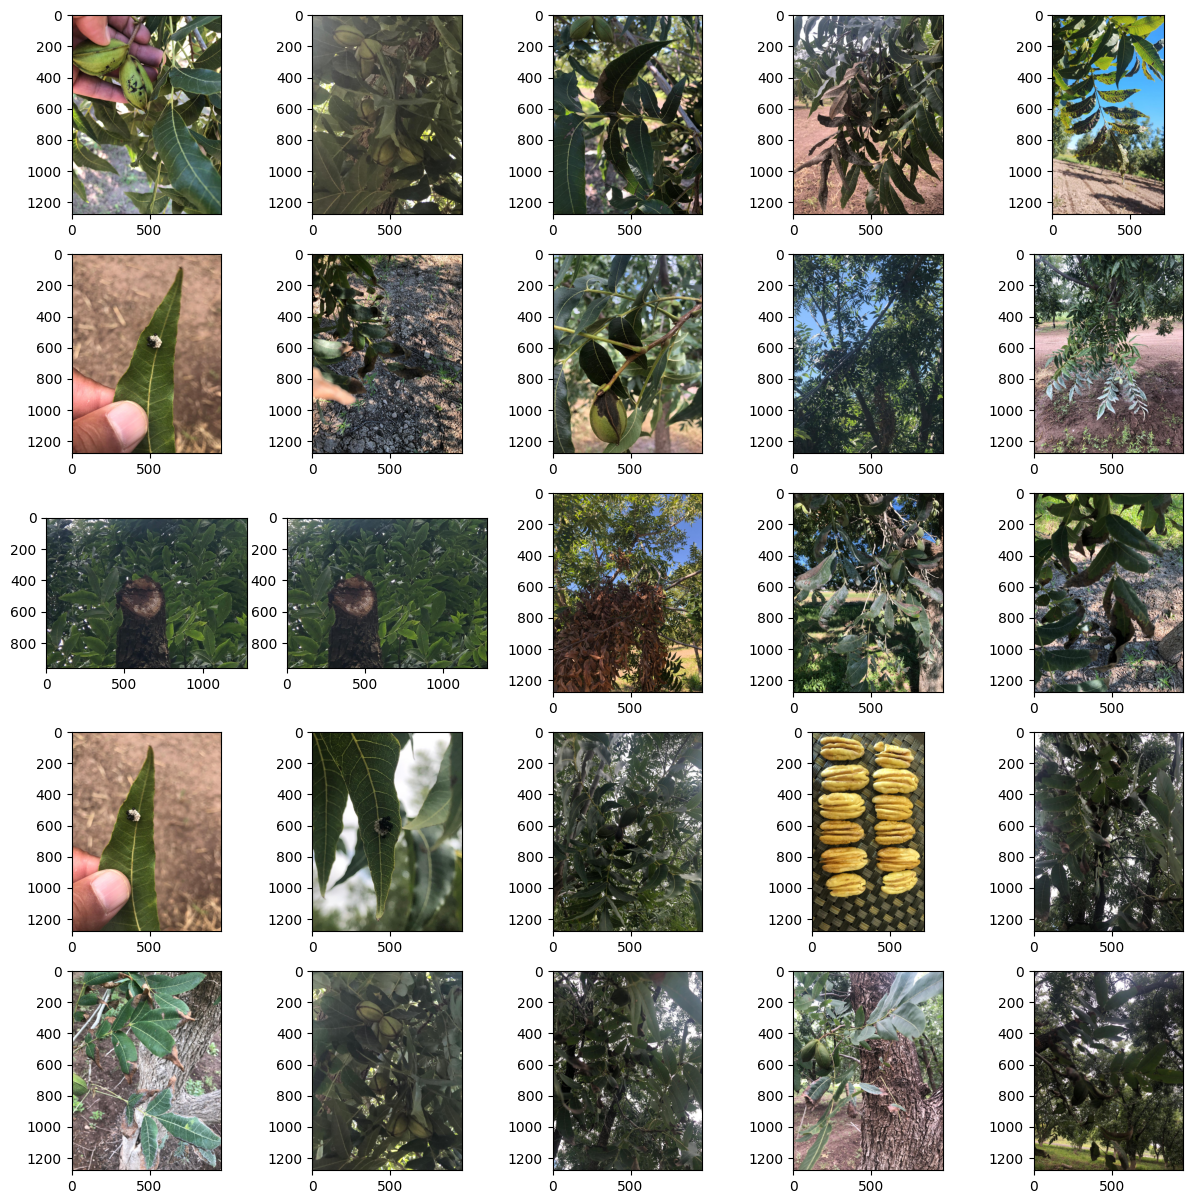

In [ ]:
#mostrar imagenes
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/enfermas'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
#carpeta dataset
!mkdir dataset
!mkdir dataset/enfermas
!mkdir dataset/sanas

In [ ]:
#copiar imagenes el mismo numero
import shutil
carpeta_fuente = '/content/enfermas'
carpeta_destino = '/content/dataset/enfermas'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
   if i < 59:
    #copia de la carpeta fuente a la detino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#copiar imagenes el mismo numero
import shutil
carpeta_fuente = '/content/sanas'
carpeta_destino = '/content/dataset/sanas'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
   if i < 59:
    #copia de la carpeta fuente a la detino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
!ls /content/dataset/sanas | wc -l
!ls /content/dataset/enfermas | wc -l

59
59


Found 96 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


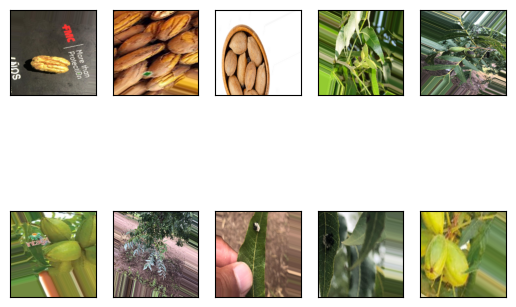

In [ ]:
#aumento de datos con imagedatagenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
#crear dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas 80% entrenamiento
)

#generadores de set de entramiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                               batch_size=32, shuffle=True, subset='validation')
#imprimir imagenes de entrenamiento
for imagen, etiqueta, in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
#modelo Mobilenet
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))


In [ ]:
#congelar modelo descargado
mobilenetv2.trainable = False

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, Model

# Cargar MobileNetV2 sin las capas superiores (top)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Congelar las capas del modelo base
base_model.trainable = False

# Crear el modelo
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs)  # Pasar las entradas a la base
x = layers.GlobalAveragePooling2D()(x)  # Capa de agrupación global
outputs = layers.Dense(2, activation='softmax')(x)  # Capa de salida
modelo = Model(inputs=inputs, outputs=outputs)

# Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ver la arquitectura del modelo
modelo.summary()




9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
#entrenamiento
EPOCAS = 50

hitorial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas,

)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.6432 - loss: 0.6852 - val_accuracy: 0.5909 - val_loss: 0.8155
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 677ms/step - accuracy: 0.6992 - loss: 0.5383 - val_accuracy: 0.6364 - val_loss: 0.6252
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.7448 - loss: 0.4895 - val_accuracy: 0.6818 - val_loss: 0.7249
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step - accuracy: 0.8750 - loss: 0.3185 - val_accuracy: 0.7273 - val_loss: 0.4884
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.8945 - loss: 0.2855 - val_accuracy: 0.7727 - val_loss: 0.4972
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - accuracy: 0.9245 - loss: 0.2391 - val_accuracy: 0.5909 - val_loss: 0.7174
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 361ms/step - accuracy: 0.9232 - loss: 0.2135 - val_accuracy: 0.7727 - val_loss: 0.5782
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 309ms/step - accuracy: 0.9466 - loss: 0.2255 - val_accuracy: 0.7273 - val_loss: 0.5001
Epoch

In [ ]:
EPOCAS = 50

hitorial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas,

)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 579ms/step - accuracy: 0.9831 - loss: 0.0522 - val_accuracy: 0.8182 - val_loss: 0.3489
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step - accuracy: 1.0000 - loss: 0.0344 - val_accuracy: 0.7727 - val_loss: 0.3976
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.9831 - loss: 0.0609 - val_accuracy: 0.8182 - val_loss: 0.3193
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 1.0000 - loss: 0.0548 - val_accuracy: 0.8182 - val_loss: 0.2479
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 1.0000 - loss: 0.0362 - val_accuracy: 0.9545 - val_loss: 0.2008
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step - accuracy: 0.9831 - loss: 0.0461 - val_accuracy: 0.8182 - val_loss: 0.3604
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - accuracy: 0.9740 - loss: 0.0705 - val_accuracy: 0.7727 - val_loss: 0.4305
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 342ms/step - accuracy: 0.9909 - loss: 0.0356 - val_accuracy: 0.8182 - val_loss:

In [ ]:

hitorial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas,

)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 1.0000 - loss: 0.0118 - val_accuracy: 0.8636 - val_loss: 0.3548
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 881ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 0.9091 - val_loss: 0.2845
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 878ms/step - accuracy: 1.0000 - loss: 0.0146 - val_accuracy: 0.9545 - val_loss: 0.1213
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 880ms/step - accuracy: 0.9909 - loss: 0.0164 - val_accuracy: 0.9091 - val_loss: 0.2429
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 907ms/step - accuracy: 1.0000 - loss: 0.0189 - val_accuracy: 0.9091 - val_loss: 0.2684
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9779 - loss: 0.0598 - val_accuracy: 0.9091 - val_loss: 0.3167
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 926ms/step - accuracy: 1.0000 - loss: 0.0209 - val_accuracy: 0.9091 - val_loss: 0.3188
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 913ms/step - accuracy: 1.0000 - loss: 0.0138 - val_accuracy: 0.9545 - val_loss: 0.261

In [ ]:

hitorial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas,

)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 652ms/step - accuracy: 0.9831 - loss: 0.0309 - val_accuracy: 0.9091 - val_loss: 0.1921
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - accuracy: 1.0000 - loss: 0.0190 - val_accuracy: 0.7727 - val_loss: 0.3526
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 358ms/step - accuracy: 1.0000 - loss: 0.0149 - val_accuracy: 0.8636 - val_loss: 0.3501
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - accuracy: 1.0000 - loss: 0.0141 - val_accuracy: 0.9091 - val_loss: 0.3971
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 481ms/step - accuracy: 0.9909 - loss: 0.0213 - val_accuracy: 0.9091 - val_loss: 0.1758
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 497ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 0.8636 - val_loss: 0.2652
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 307ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 0.9091 - val_loss: 0.1928
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 0.9545 - val_loss: